In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Завантажте дані з файлу CSV

In [9]:
df = pd.read_csv('employees.csv')
df.head()

,first_name,last_name,age,position,salary,work_experience
0,NaN,Becker,23,NaN,-22349,7
1,Duane,Wright,45,senior,39362,5
2,Devon,Carr,42,tech_lead,35589,15
3,NaN,Schmidt,20,senior,22600,1
4,Ruben,Cunningham,20,middle,27199,11


### Видаліть рядки з неправильними або відсутніми даними

In [13]:
df = df.dropna()
df.head(15)

,first_name,last_name,age,position,salary,work_experience
1,Duane,Wright,45,senior,39362,5
2,Devon,Carr,42,tech_lead,35589,15
4,Ruben,Cunningham,20,middle,27199,11
6,Richard,Frye,25,senior,24411,14
7,John,Gibson,40,team_lead,22302,7
8,Sharon,Williams,38,tech_lead,37857,9
10,Robert,Garcia,40,senior,28073,9
11,Megan,Grant,26,middle,27081,7
12,Kristin,Oliver,22,team_lead,31020,11
13,Katelyn,Lopez,32,team_lead,20050,5


In [14]:
df.shape

(39, 6)

In [15]:
df['salary'] = df['salary'].apply(lambda x: -1 * x if x < 0 else x)
df.head(15)

,first_name,last_name,age,position,salary,work_experience
1,Duane,Wright,45,senior,39362,5
2,Devon,Carr,42,tech_lead,35589,15
4,Ruben,Cunningham,20,middle,27199,11
6,Richard,Frye,25,senior,24411,14
7,John,Gibson,40,team_lead,22302,7
8,Sharon,Williams,38,tech_lead,37857,9
10,Robert,Garcia,40,senior,28073,9
11,Megan,Grant,26,middle,27081,7
12,Kristin,Oliver,22,team_lead,31020,11
13,Katelyn,Lopez,32,team_lead,20050,5


### Виконайте декілька агрегаційних операцій, наприклад, обчисліть середню зарплату та максимальний вік працівників

In [16]:
df.salary.sum()

1221987

In [17]:
df.salary.mean()

31333.0

In [18]:
df.age.mean()

33.41025641025641

In [19]:
df.work_experience.mean()

6.9743589743589745

In [20]:
df[['position', 'salary']].groupby('position').sum()

,salary
position,
junior,96734
middle,384407
senior,300289
team_lead,286681
tech_lead,153876


In [21]:
df[['position', 'salary']].groupby('position').mean()

,salary
position,
junior,32244.666667
middle,32033.916667
senior,33365.444444
team_lead,28668.100000
tech_lead,30775.200000


In [22]:
df[['position', 'age']].groupby('position').max()

,age
position,
junior,35
middle,45
senior,45
team_lead,41
tech_lead,42


### Створіть таблицю з півотом, використовуючи зарплату як значення, а посаду та вік як рядки та стовпці відповідно

In [23]:
df.pivot_table(index='position', columns='age', values='salary', aggfunc='mean')

age,20,21,22,23,24,25,26,27,29,31,...,34,35,36,37,38,40,41,42,44,45
position,,,,,,,,,,,,,,,,,,,,,
junior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44851.0,NaN,...,NaN,25394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
middle,27199.0,25701.0,NaN,NaN,26119.0,35765.0,27081.0,33813.5,38215.0,NaN,...,NaN,NaN,NaN,40653.0,NaN,NaN,33980.0,NaN,NaN,31033.5
senior,NaN,NaN,NaN,NaN,NaN,24411.0,NaN,NaN,NaN,NaN,...,31957.0,31898.0,41973.0,30164.0,NaN,30764.0,NaN,NaN,38996.0,39362.0
team_lead,NaN,NaN,31020.0,37769.0,NaN,NaN,21949.0,38904.0,NaN,NaN,...,NaN,NaN,20827.0,NaN,NaN,30196.5,31009.0,NaN,NaN,NaN
tech_lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20792.0,...,NaN,NaN,NaN,NaN,37857.0,NaN,26207.0,35589.0,NaN,NaN


In [24]:
df.pivot_table(index='age', columns='position', values='salary', aggfunc='mean')

position,junior,middle,senior,team_lead,tech_lead
age,,,,,
20,NaN,27199.0,NaN,NaN,NaN
21,NaN,25701.0,NaN,NaN,NaN
22,NaN,NaN,NaN,31020.0,NaN
23,NaN,NaN,NaN,37769.0,NaN
24,NaN,26119.0,NaN,NaN,NaN
25,NaN,35765.0,24411.0,NaN,NaN
26,NaN,27081.0,NaN,21949.0,NaN
27,NaN,33813.5,NaN,38904.0,NaN
29,44851.0,38215.0,NaN,NaN,NaN


### Побудуйте графік, що відображає залежність зарплати від віку працівників

<Axes: xlabel='age'>

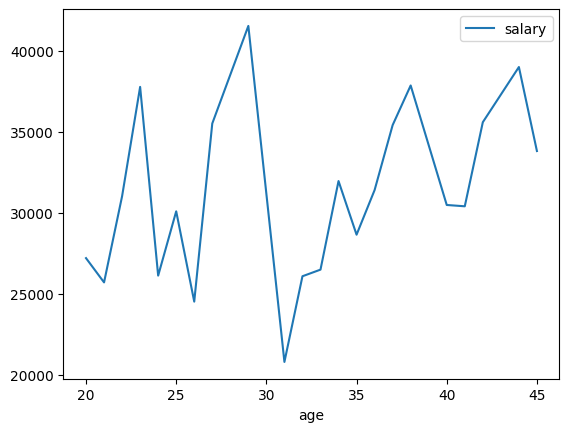

In [25]:
df_chart = df[['age', 'salary']].groupby('age').mean()
df_chart.plot()